In [1]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('v1_model.csv')
dataset.head(1)

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes,HeartAttack
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0,0


In [2]:
features=dataset.iloc[:,:-1]
label=dataset.iloc[:,-1:]

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.3,shuffle=False)


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_score

m1=Perceptron(random_state=1729,max_iter=1,eta0=1,shuffle=False,validation_fraction=0.1,alpha=0,warm_start=True,fit_intercept=True)
for i in range(0,5):
    m1.fit(X_train,y_train)
print(m1.intercept_)

[-3.]


c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Cons

In [5]:
y_pred=m1.predict(X_train)
precision_score(y_train,y_pred)

0.6666666666666666

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
m2=SGDClassifier(loss='log_loss',penalty='l2',eta0=0.001,max_iter=1,alpha=0,learning_rate='constant',random_state=1729,warm_start=True)
for i in range(0,4):
    m2.fit(X_train,y_train)
    print(log_loss(y_train,m2.predict(X_train)))

1.7506917360428333
1.7506917360428333
1.7506917360428333
1.7506917360428333


c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Cons

In [7]:
from sklearn.model_selection import GridSearchCV

m3=SGDClassifier(loss='log_loss',learning_rate='constant',random_state=1729)
param_grid={"alpha":[0.0001,0.0005,0.001,0.005],"eta0":[0.01,0.05,0.1,0.5]}
search=GridSearchCV(m3,param_grid=param_grid)
search.fit(X_train,y_train)
search.best_params_

c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

{'alpha': 0.0001, 'eta0': 0.01}

In [8]:
m5=SGDClassifier(alpha=0.0001,eta0=0.01,learning_rate='constant',random_state=1729,class_weight={0:0.1,1:2})
m5.fit(X_train,y_train)
pred=m5.predict(X_test)
ctr=0
for i in range(0,len(y_test.values)):
    if pred[i]==y_test.values[i][0] and y_test.values[i][0]==1:
        ctr+=1
ctr

c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


49

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
m6=SVC(kernel='rbf',decision_function_shape='ovr',random_state=1729,C=1)
m6.fit(X_train,y_train)
confusion_matrix(y_test,m6.predict(X_test))

c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1142,    0],
       [  58,    0]], dtype=int64)

In [10]:
from sklearn.tree import DecisionTreeClassifier

m7=DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=4,min_impurity_decrease=0.0001,random_state=1729)
m7.fit(X_train,y_train)
m7.get_depth()

20

In [11]:
print(m7.tree_.node_count)
print(m7.tree_.max_depth)

515
20


[Text(0.5, 0.8333333333333334, 'x[1] <= -0.142\nentropy = 0.28\nsamples = 2800\nvalue = [2664, 136]'), Text(0.25, 0.5, 'x[0] <= 0.28\nentropy = 0.025\nsamples = 1237\nvalue = [1234, 3]'), Text(0.125, 0.16666666666666666, '\n  (...)  \n'), Text(0.375, 0.16666666666666666, '\n  (...)  \n'), Text(0.75, 0.5, 'x[1] <= 1.514\nentropy = 0.42\nsamples = 1563\nvalue = [1430, 133]'), Text(0.625, 0.16666666666666666, '\n  (...)  \n'), Text(0.875, 0.16666666666666666, '\n  (...)  \n')]


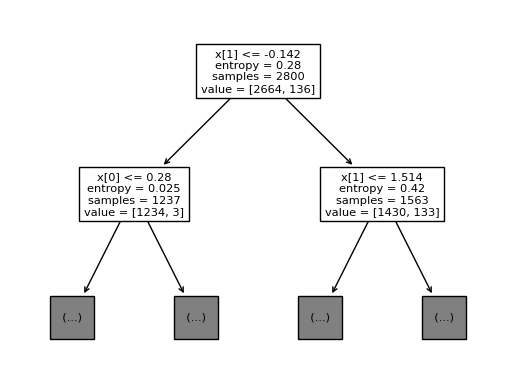

In [12]:
from sklearn.tree import plot_tree

print(plot_tree(m7,max_depth=1))

In [13]:
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

m8=DecisionTreeClassifier(random_state=1729)
m9=KNeighborsClassifier()
m10=SGDClassifier(loss='log_loss',learning_rate='constant',eta0=1,alpha=0,random_state=1729)
m11=BaggingClassifier(estimator=m10,n_estimators=20,random_state=1729)
m12=VotingClassifier(estimators=[('dt',m8),('kn',m9),('sg',m10)])
m12.fit(X_train,y_train)
train_score=accuracy_score(y_train,m12.predict(X_train))
test_score=accuracy_score(y_test,m12.predict(X_test))
print(abs(train_score-test_score))

c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kabir\miniconda3\envs\iitm-mlp\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.027976190476190488


In [14]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0, base_estimator='deprecated')
 |
 |  A Bagging classifier.
 |
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the